In [4]:
from ADMCode import visualize as vis
from ADMCode import qlearn, style_notebook
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
style_notebook()

# Q-learning

### Equations
---
* **Q-update**: $$Q(a_i) \leftarrow  Q(a_i) + \alpha (r_t - Q(a_i))$$

* **Softmax policy**: $$P(a_i) = \frac{e^{\beta Q(a_i)}}{\sum_j^N e^{\beta Q(a_j)}}$$

#  Questions: 
#### (double click on the cells below to edit)

## **Question 1:**  

**1a)** 

* **Answer 1a:** 



**1b)** 

* **Answer 1b:** 



**1c)** 

* **Answer 1c:** 



In [22]:
# alpha (float):  learning rate parameter
# beta (float):   inverse temperature parameter 
# preward (list): 1xN vector of P(r) for each bandit
# rvalues (list): 1xN vector of rew. values for each bandit
agent = qlearn.Qagent(alpha=.08, 
                      beta=2.5, 
                      preward=[.85, .75, .65], 
                      rvalues=[1, 1, 1])

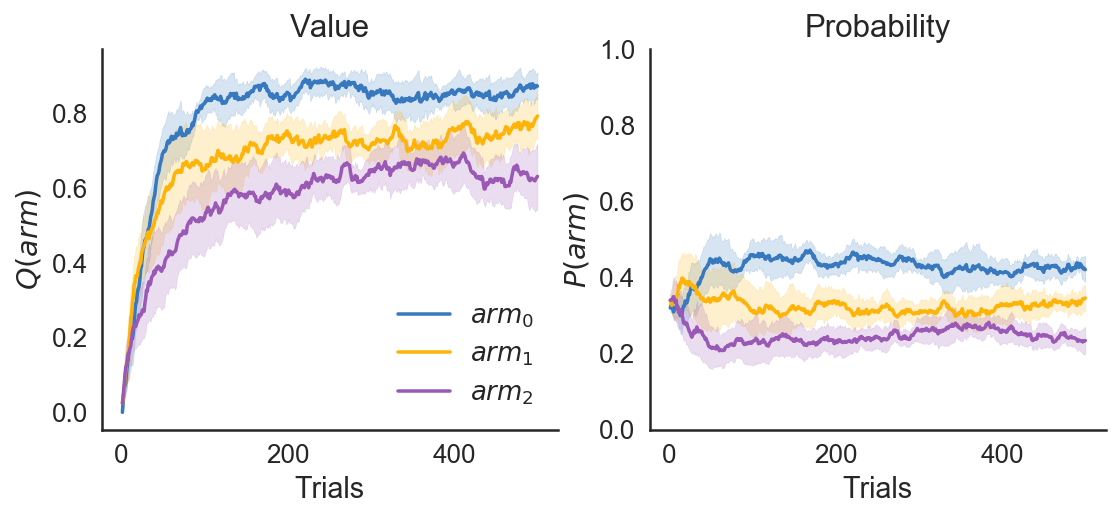

In [24]:
agent.set_agent_params(alpha=.08, beta=2.5)
data1 = agent.simulate_multiple_agents(nagents=10, ntrials=500)
vis.plot_qlearning(data1)

## **Question 2:**  

**2a)** 

* **Answer 2a:** 



**2b)** 

* **Answer 2b:** 



**2c)** 

* **Answer 2c:** 



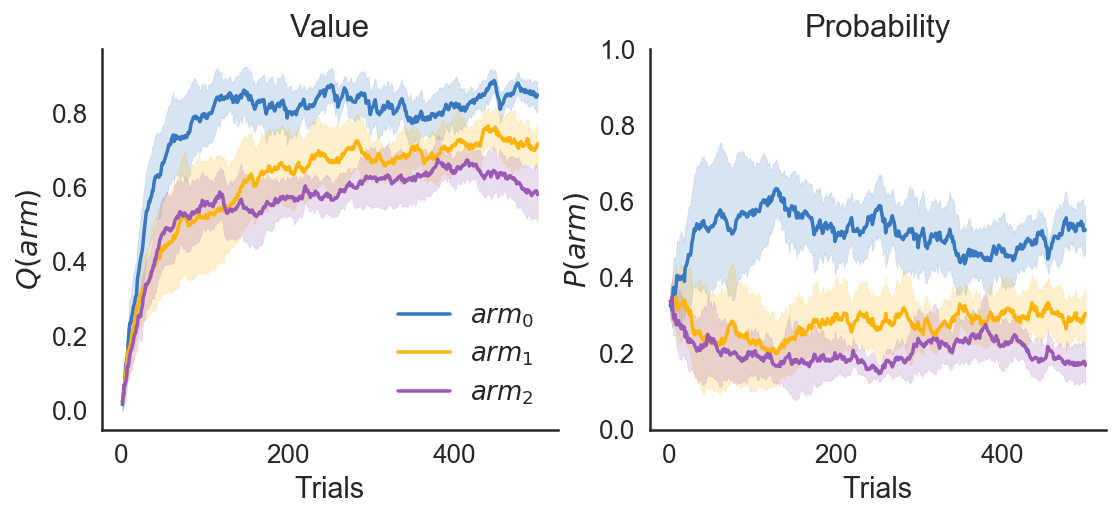

In [27]:
agent.set_agent_params(alpha=.08, beta=4.5)
data2 = agent.simulate_multiple_agents(nagents=10, ntrials=500)
vis.plot_qlearning(data2)

## **Bonus Problem**  

**a)** TEXT DESCRIBING CODING CHALLENGE FOR BONUS POINTS

* **Bonus Answer a:** *copy/paste your modified code into a code cell below* 

**b)** Run a set of simulations with your modified function with no errors.

* **Bonus Answer b:** *you get credit if I can run your modified code*

# Q-learning code

In [40]:
def update_Qi(Qval, reward, alpha):
    """ update q-value of selected action, given reward and alpha
    """
    return Qval + alpha*(reward - Qval)

def update_Pall(Qvector, beta):
    """ update vector of action selection probabilities given
    associated q-values
    """
    return np.array([np.exp(beta*Q_i) / np.sum(np.exp(beta * Qvector)) for Q_i in Qvector])

In [41]:
def play_bandits(alpha=.1, beta=.15, preward=[.8, .5, .2], ntrials=1000):
    """ 
    ::Arguments::
        alpha (float): learning rate
        beta (float): inverse temperature parameter
        preward (list): 1xN vector of P(reward) for each of N bandits
        ntrials (int): number of trials to play bandits
    ::Returns::
        pandasDF (Ntrials x Nbandits), trialwise Q/P values per bandit
    """
    nact = len(preward)
    actions = np.arange(nact)  
    rvalues = np.ones(nact)
    
    bandits = qlearn.MultiArmedBandit(preward=preward, rvalues=rvalues)
    
    Qmatrix=np.zeros((ntrials, nact))
    Pmatrix=np.zeros_like(Qmatrix)
    Qvalues = Qmatrix[0, :]
    Pvalues = np.array([1/nact]*nact)

    for t in range(ntrials):
        # select bandit arm (action)
        act_i = np.random.choice(actions, p=Pvalues)
        
        # observe feedback
        r = bandits.get_feedback(act_i)
        # get expected value 
        Qexpected = Qvalues[act_i]
        # update expected value and store in Qvalues array
        # Qexpected + alpha * (r - Qexpected)
        Qvalues[act_i] = update_Qi(Qexpected, r, alpha)
        
        # update action selection probabilities 
        Pvalues = update_Pall(Qvalues, beta)
        
        # store new values in output matrices
        Qmatrix[t, :] = Qvalues
        Pmatrix[t, :] = Pvalues
        
    return make_output_df(Qmatrix, Pmatrix)  

In [42]:
def make_output_df(Qmatrix, Pmatrix):
    """ generate output dataframe with trialwise Q and P measures for each bandit,
    as well as choice selection, and feedback
    ::Arguments::
        Qmatrix (ndarray): q-value array with dims [Ntrials x Nbandits] 
        Pmatrix (ndarray): softmax prob array with dims [Ntrials x Nbandits] 
    ::Returns::
        df (DataFrame): pandas df containing Q and P values for each bandit [Ntrials x 2*Nbandits]
    """
    actions = np.arange(Qmatrix.shape[1])
    df = pd.concat([pd.DataFrame(dat) for dat in [Qmatrix, Pmatrix]], axis=1)
    cols = [['{}{}'.format(x,c) for c in actions] for x in ['q', 'p']]
    df.columns = np.hstack(cols)
    df.insert(0, 'trial', np.arange(1, df.shape[0]+1))
    return df

In [43]:
df = play_bandits(alpha=.1, beta=2, preward=[.85, .75, .65])

In [44]:
df.head()

,trial,q0,q1,q2,p0,p1,p2
0,1,0.8013,0.6865,0.6183,0.3104,0.3792,0.3104
1,2,0.1000,0.1000,0.0000,0.3548,0.3548,0.2905
2,3,0.1000,0.1900,0.0000,0.3316,0.3970,0.2715
3,4,0.1900,0.1900,0.0000,0.3726,0.3726,0.2548
4,5,0.1710,0.1900,0.0000,0.3638,0.3778,0.2584


In [49]:
from ADMCode import style_notebook
style_notebook()